## Setup

In [31]:
# Imports
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
big_ring_df = pd.read_csv("../timeCSVs/bigRingDimTimes.csv")

big_ring_df.drop([' setup', ' encryption', ' homomorphic', ' decryption', ' plaintext', ' value'], axis=1,inplace=True)

big_ring_df.head()

,type,ringDim,total
0,n16-coef-sum,32,4
1,n16-coef-sum,32,10
2,n16-coef-sum,32,21
3,n16-coef-sum,32,4
4,n16-coef-sum,32,4


In [33]:
n16_df = big_ring_df[big_ring_df['type'].str.contains('n16')]
n32_df = big_ring_df[big_ring_df['type'].str.contains('n32')]
n64_df = big_ring_df[big_ring_df['type'].str.contains('n64')]
n128_df = big_ring_df[big_ring_df['type'].str.contains('n128')]
n256_df = big_ring_df[big_ring_df['type'].str.contains('n256')]

In [34]:
n16_mean_df = n16_df.groupby(['type', ' ringDim'], as_index=False)[' total'].mean()
n16_mean_df.loc[n16_mean_df['type'] == 'n16-coef-inner', 'type'] = 'coef_inner_product'
n16_mean_df.loc[n16_mean_df['type'] == 'n16-coef-sum', 'type'] = 'coef_sum'
n16_mean_df.loc[n16_mean_df['type'] == 'n16-slot-inner', 'type'] = 'slot_inner_product'
n16_mean_df.loc[n16_mean_df['type'] == 'n16-slot-sum', 'type'] = 'slot_sum'

In [35]:
n32_mean_df = n32_df.groupby(['type', ' ringDim'], as_index=False)[' total'].mean()
n32_mean_df.loc[n32_mean_df['type'] == 'n32-coef-inner', 'type'] = 'coef_inner_product'
n32_mean_df.loc[n32_mean_df['type'] == 'n32-coef-sum', 'type'] = 'coef_sum'
n32_mean_df.loc[n32_mean_df['type'] == 'n32-slot-inner', 'type'] = 'slot_inner_product'
n32_mean_df.loc[n32_mean_df['type'] == 'n32-slot-sum', 'type'] = 'slot_sum'

In [36]:
n64_mean_df = n64_df.groupby(['type', ' ringDim'], as_index=False)[' total'].mean()
n64_mean_df.loc[n64_mean_df['type'] == 'n64-coef-inner', 'type'] = 'coef_inner_product'
n64_mean_df.loc[n64_mean_df['type'] == 'n64-coef-sum', 'type'] = 'coef_sum'
n64_mean_df.loc[n64_mean_df['type'] == 'n64-slot-inner', 'type'] = 'slot_inner_product'
n64_mean_df.loc[n64_mean_df['type'] == 'n64-slot-sum', 'type'] = 'slot_sum'

In [37]:
n128_mean_df = n128_df.groupby(['type', ' ringDim'], as_index=False)[' total'].mean()
n128_mean_df.loc[n128_mean_df['type'] == 'n128-coef-inner', 'type'] = 'coef_inner_product'
n128_mean_df.loc[n128_mean_df['type'] == 'n128-coef-sum', 'type'] = 'coef_sum'
n128_mean_df.loc[n128_mean_df['type'] == 'n128-slot-inner', 'type'] = 'slot_inner_product'
n128_mean_df.loc[n128_mean_df['type'] == 'n128-slot-sum', 'type'] = 'slot_sum'

In [38]:
n256_mean_df = n256_df.groupby(['type', ' ringDim'], as_index=False)[' total'].mean()
n256_mean_df.loc[n256_mean_df['type'] == 'n256-coef-inner', 'type'] = 'coef_inner_product'
n256_mean_df.loc[n256_mean_df['type'] == 'n256-coef-sum', 'type'] = 'coef_sum'
n256_mean_df.loc[n256_mean_df['type'] == 'n256-slot-inner', 'type'] = 'slot_inner_product'
n256_mean_df.loc[n256_mean_df['type'] == 'n256-slot-sum', 'type'] = 'slot_sum'

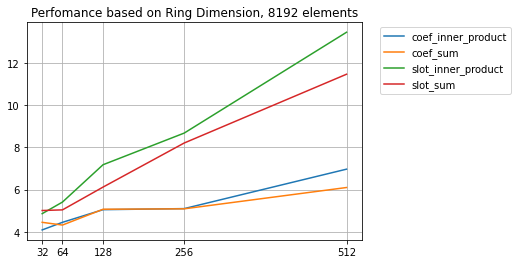

In [39]:
fig, ax = plt.subplots()

ax.plot(n16_mean_df[n16_mean_df['type'] == 'coef_inner_product'][' ringDim'], n16_mean_df[n16_mean_df['type'] == 'coef_inner_product'][' total'], label='coef_inner_product')
ax.plot(n16_mean_df[n16_mean_df['type'] == 'coef_sum'][' ringDim'], n16_mean_df[n16_mean_df['type'] == 'coef_sum'][' total'], label='coef_sum')
ax.plot(n16_mean_df[n16_mean_df['type'] == 'slot_inner_product'][' ringDim'], n16_mean_df[n16_mean_df['type'] == 'slot_inner_product'][' total'], label='slot_inner_product')
ax.plot(n16_mean_df[n16_mean_df['type'] == 'slot_sum'][' ringDim'], n16_mean_df[n16_mean_df['type'] == 'slot_sum'][' total'], label='slot_sum')

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.25, 1))
ax.set_title("Perfomance based on Ring Dimension, 8192 elements")
ax.grid('on')

plt.xticks([32, 64, 128, 256, 512])
plt.show()

In [41]:
n128_mean_df

,type,ringDim,total
0,coef_inner_product,256,5.25
1,coef_inner_product,512,7.19
2,coef_sum,256,5.60
3,coef_sum,512,6.16
4,slot_inner_product,256,8.97
5,slot_inner_product,512,13.23
6,slot_sum,256,8.14
7,slot_sum,512,11.53
